In [2]:
import numpy as np
import pandas as pd

In [3]:
df =pd.read_csv("gpt_dataset.csv")

In [4]:
df = df.drop_duplicates()

In [5]:
df["Category"].value_counts()

Full Stack Developer                  30
Data Scientist                        29
Frontend Developer                    24
Mobile App Developer (iOS/Android)    23
Cloud Engineer                        23
Python Developer                      22
Backend Developer                     19
Machine Learning Engineer             18
Name: Category, dtype: int64

In [6]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [7]:
df['Resume']=df['Resume'].apply(lambda x:x.lower()) # convert data into lowercase 


In [8]:
# removing stopwords
import nltk
from nltk.corpus import stopwords
sw_list=stopwords.words('english')

In [9]:
df['Resume']=df['Resume'].apply(lambda x:[item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [10]:
df

,Category,Resume
0,Frontend Developer,"seasoned frontend developer, proven track reco..."
1,Backend Developer,"solid background backend development, bring 7 ..."
2,Python Developer,"python developer, leverage expertise python pr..."
3,Data Scientist,"background data science, possess unique blend ..."
4,Frontend Developer,experienced frontend developer passion craftin...
...,...,...
388,Cloud Engineer,skilled cloud engineer focus building secure s...
389,Cloud Engineer,experienced cloud engineer focus designing imp...
397,Full Stack Developer,experienced full stack developer expertise dev...
398,Full Stack Developer,innovative full stack developer passion buildi...


In [11]:
#removing numbers from data

df['Resume']=df['Resume'].apply(lambda x:' '.join([i for i in x.split() if not i.isdigit()]))

In [12]:
#remove punctuation from data
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [13]:
df['Resume']=df['Resume'].apply(remove_punctuation)


In [14]:
#separating test data

sample_test = df.sample(10)

df = df[~df['Resume'].isin(sample_test['Resume'])]

# Applying ML

In [15]:
x=df.drop(columns='Category')
y=df['Category']


In [16]:
#converting categorical into numerical
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)
y


array([3, 0, 7, 2, 3, 3, 0, 0, 7, 7, 3, 0, 7, 2, 0, 7, 3, 0, 7, 2, 2, 4,
       4, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4,
       7, 7, 7, 7, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 5, 5, 5,
       5, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 5, 5, 5, 5, 1, 1, 1, 1, 2,
       2, 2, 0, 0, 0, 0, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4,
       4])

In [17]:
df2=pd.DataFrame(y)
z1=df['Category'].unique()
z2=df2[0].unique()


In [18]:
dict={}
for i in range(len(z2)):
    dict[z2[i]]=z1[i]

In [19]:
dict

{3: 'Frontend Developer',
 0: 'Backend Developer',
 7: 'Python Developer',
 2: 'Data Scientist',
 4: 'Full Stack Developer',
 6: 'Mobile App Developer (iOS/Android)',
 5: 'Machine Learning Engineer',
 1: 'Cloud Engineer'}

In [20]:
# train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3,stratify=y)
print(x_train.shape,x_test.shape)


(141, 1) (36, 1)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x_train=tfidf.fit_transform(x_train['Resume']).toarray()
x_test=tfidf.transform(x_test['Resume'])

In [22]:
# applying random forest algorithm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9722222222222222

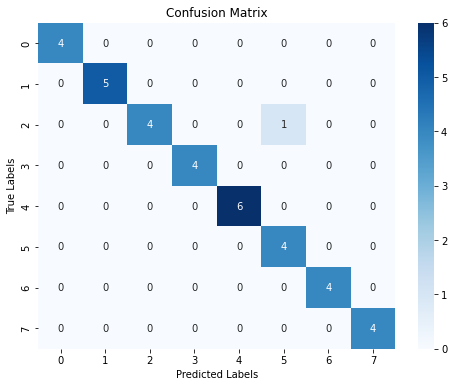

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [24]:
rf.predict(tfidf.transform(sample_test['Resume']))

array([2, 3, 7, 6, 2, 2, 3, 2, 2, 4])

In [25]:
sample_test.to_csv("sample_test_resume.csv",index=False)

In [28]:
import joblib

# Assuming `classifier` is your trained Random Forest classifier
joblib.dump(rf, 'resumeclassifier.joblib')
joblib.dump(tfidf, 'tfidf.joblib')

['tfidf.joblib']